In [1]:
import pickle
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
from statistics import stdev
from math import log
import numpy as np
from scipy import stats
from statistics import mean
%matplotlib inline


In [67]:
price_100_stan = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Initial\\NetScape_Standard\\stan_total_price.p","rb"))
price_100_net5 = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy1\\total_price_5_policy_better.p", "rb"))
price_100_net_ging5 = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy2\\total_price_ging5_policy_better.p", "rb"))
price_100_net10 = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy1\\total_price_10_policy_better.p", "rb"))
price_100_net_ging10 = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy2\\total_price_ging10_policy_better.p", "rb"))
price_order = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy1\\total_price_10_policy_order.p", "rb"))

In [68]:
from collections import defaultdict

def make_distro(price_100):
    all_stds =[]
    total_log = defaultdict(list)
    for run, output in price_100.items(): 
        for step, prices in output.items():
            log_pr = [log(p) for p in prices]
            if len(log_pr) <2: 
                pass       
            else:     
                out = stdev(log_pr)
                total_log[run].append(out) 
                all_stds.append(out)
    return all_stds




In [69]:
price_stan = make_distro(price_100_stan)
price_net5 = make_distro(price_100_net5)
price_net_g5 = make_distro(price_100_net_ging5)
price_net10 = make_distro(price_100_net10)
price_net_g10 = make_distro(price_100_net_ging10)
price_net_order = make_distro(price_order)


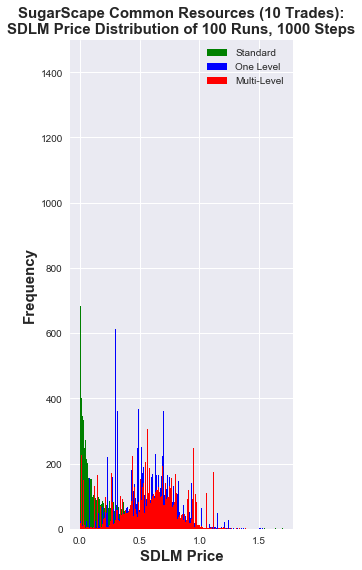

In [86]:
fig, ax = plt.subplots(figsize = (4,9))
ax.hist(price_stan, 500, label = "Standard", color ='green')
ax.hist(price_net10, 500, label = "One Level", color='blue')
ax.hist(price_net_g10, 500, label = "Multi-Level", color = 'red')
#ax.hist(price_net_order, 500, label = "Group Order", color = 'yellow')
plt.title("SugarScape Common Resources (10 Trades):\nSDLM Price Distribution of 100 Runs, 1000 Steps",\
          fontsize = 15, fontweight = "bold")
plt.xlabel("SDLM Price", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 15, fontweight = "bold")
#plt.xlim(.75,2)
plt.ylim(0,1500)
plt.legend()

In [10]:
## Calculate price

In [72]:
ind_stan = price_100_stan["Run42"]
ind_net = price_100_net10["Run42"]
ind_net_g = price_100_net_ging10["Run42"]
ind_order = price_order["Run42"]

In [73]:
def ind_price(ind_e):
    x = []
    y =[]
    for st, pr in ind_e.items(): 
        #if step <=400: 
            x.append(st)
            y.append(gmean(pr))
    return (x,y)
        


In [74]:
x_s, y_s = ind_price(ind_stan)
x_b, y_b = ind_price(ind_net_g)
x_n, y_n = ind_price(ind_net)
x_o, y_o = ind_price(ind_order)

In [14]:
for p in ind_net[736]:
    print (abs(log(p)))

0.7095851010926849
0.912317655146767
0.912317655146767
0.7095851010926849


(0, 3)

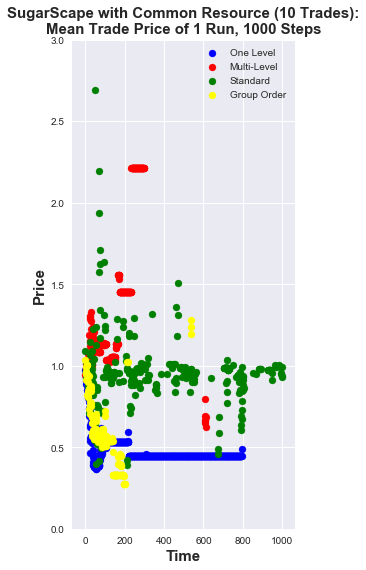

In [75]:
fig, ax = plt.subplots(figsize = (4,9))
ax.scatter(x_n, y_n, label = "One Level", color='blue')
ax.scatter(x_b,y_b, label = "Multi-Level", color = 'red')
ax.scatter(x_s,y_s, label = "Standard", color ='green')
ax.scatter(x_o,y_o, label = "Group Order", color ='yellow')

plt.title("SugarScape with Common Resource (10 Trades):\nMean Trade Price of 1 Run, 1000 Steps",\
          fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Price", fontsize = 15, fontweight = "bold")
plt.legend()
plt.ylim(0,3)

In [76]:
def ind_volume(ind_e):
    x_vol = []
    y_vol = []
    total = 0
    for s, p in ind_e.items(): 
        #if step <=400:

            x_vol.append(s)
            y_vol.append(len(p))
            total += len(p)
    return (x_vol, y_vol, total)

In [18]:
x_vol_stan, y_vol_stan, stan_vol = ind_volume(ind_stan)
x_vol_net_g, y_vol_net_g, net_g_vol = ind_volume(ind_net_g)
x_vol_net, y_vol_net, net_vol = ind_volume(ind_net)

In [19]:
len(y_vol_net)

794

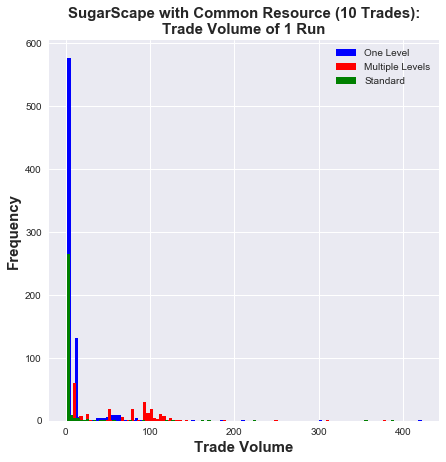

In [20]:
fig2, ax2 = plt.subplots(figsize = (7,7))
ax2.hist(y_vol_net, 100, label = "One Level", color='blue')
ax2.hist(y_vol_net_g, 100, label = "Multiple Levels", color = 'red')
ax2.hist(y_vol_stan, 100, label = "Standard", color ='green')
plt.title("SugarScape with Common Resource (10 Trades):\nTrade Volume of 1 Run",\
            fontsize = 15, fontweight = "bold")
plt.xlabel("Trade Volume", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 15, fontweight = "bold")
plt.legend()

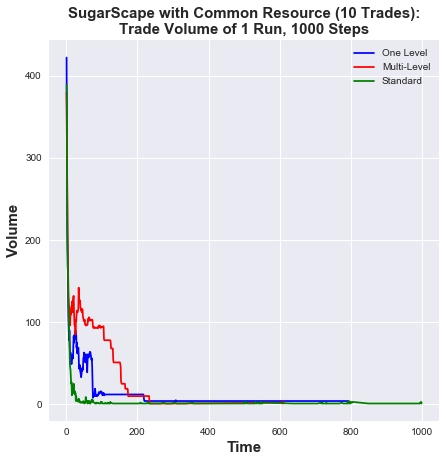

In [22]:
fig2, ax2 = plt.subplots(figsize = (7,7))
ax2.plot(x_vol_net, y_vol_net, label = "One Level", color='blue')
ax2.plot(x_vol_net_g, y_vol_net_g, label = "Multi-Level", color = 'red')
ax2.plot(x_vol_stan, y_vol_stan, label = "Standard", color ='green')
plt.title("SugarScape with Common Resource (10 Trades):\nTrade Volume of 1 Run, 1000 Steps",\
            fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Volume", fontsize = 15, fontweight = "bold")
#ax2.text(600,300, "Total Trade Volume: \n "+str(total), fontsize = 15, fontweight = 'bold')
#plt.ylim(0,400)
plt.legend()

In [23]:

def sdlm(ind_e):
    x_dev =[]
    y_dev = []
    x_all = []
    y_all = []
    log_prices = {}
    for step, prices in ind_e.items(): 
        log_prices[step] = [log(p) for p in prices]
        
    for step, log_p in log_prices.items(): 
        #if step <= 400: 


            if len(log_p) <2: 
                pass       
            else: 
                for each in log_p: 
                    x_all.append(step)
                    y_all.append(each)

                x_dev.append(step)
                y_dev.append(stdev(log_p))
    return (x_dev, y_dev, x_all, y_all)
    


In [24]:
x_dev_stan, y_dev_stan, x_all_stan, y_all_stan = sdlm(ind_stan)
x_dev_net_g, y_dev_net_g, x_all_net_g, y_all_net_g = sdlm(ind_net_g)
x_dev_net, y_dev_net, x_all_net, y_all_net = sdlm(ind_net)


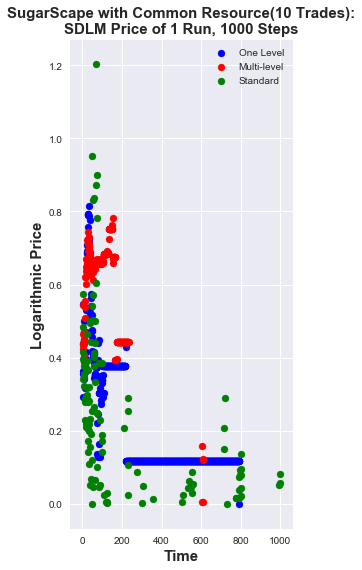

In [25]:
#from numpy.polynomial.polynomial import polyfit
fig3, ax3 = plt.subplots(figsize=(4,9))
ax3.scatter(x_dev_net, y_dev_net, label = "One Level", color='blue')
ax3.scatter(x_dev_net_g, y_dev_net_g, label = "Multi-level", color = 'red')
ax3.scatter(x_dev_stan, y_dev_stan, label = "Standard", color ='green')
plt.title("SugarScape with Common Resource(10 Trades):\nSDLM Price of 1 Run, 1000 Steps",\
            fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Logarithmic Price", fontsize = 15, fontweight = "bold")
plt.legend()


In [78]:
stan_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Initial\\NetScape_Standard\\stan_multi_sur.p", "rb"))
stan_multi_t = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Initial\\NetScape_Standard\\stan_multi_time.p", "rb"))
net_multi_s = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy1\\net_multi_sur_10_policy_better.p", "rb"))
net_multi_t =pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy1\\net_multi_time_10_policy_better.p", "rb"))
net_multi_s_g = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy2\\net_multi_sur_ging10_policy_better.p", "rb"))
net_multi_t_g =pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy2\\net_multi_time_ging10_policy_better.p", "rb"))
net_multi_s_o = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy1\\net_multi_sur_10_policy_order.p", "rb"))
net_multi_t_o =pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy1\\net_multi_time_10_policy_order.p", "rb"))
net_mean = mean(net_multi_s)
stan_mean = mean(stan_multi_s)
net_time = round(mean(net_multi_t),2)
stan_time = round(mean(stan_multi_t),2)


In [90]:
t2,  p2 = stats.ttest_ind(net_multi_s,net_multi_s_g)
net_p = p2 * 2
print (net_p)
t1,  p1 = stats.ttest_ind(net_multi_s_g,net_multi_s_o)
net_p2 = p2 * 2
print (net_p2)

1.84493788541
1.84493788541


Text(0,0.5,'Frequency')

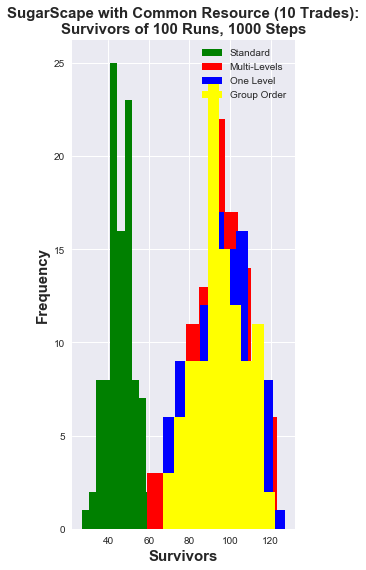

In [80]:
fig5, ax5 = plt.subplots(figsize=(4,9))
plt.hist(stan_multi_s, label = "Standard", color = 'green')
plt.hist(net_multi_s_g, label = "Multi-Levels", color = 'red')
plt.hist(net_multi_s, label = "One Level", color = 'blue')
plt.hist(net_multi_s_o, label = "Group Order", color = 'yellow')

#plt.text(20, 24.8, "Network-Explicit\np-value: " + str(round(net_p,2)))
plt.legend()
plt.title("SugarScape with Common Resource (10 Trades):\nSurvivors of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
plt.xlabel("Survivors", fontweight = "bold", fontsize = 15)
plt.ylabel('Frequency', fontweight = "bold", fontsize = 15)

Text(0,0.5,'Frequency')

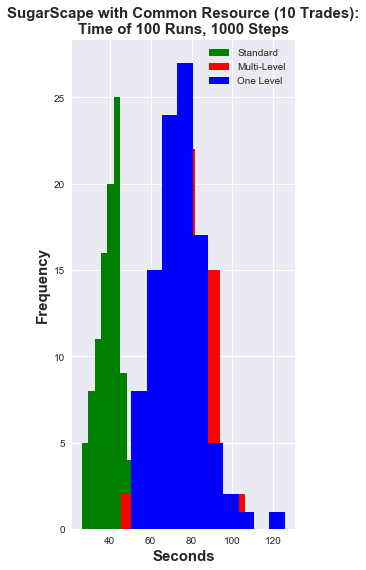

In [41]:
fig6, ax6 = plt.subplots(figsize=(4,9))
plt.hist(stan_multi_t, label = "Standard", color ='green')
plt.hist(net_multi_t_g, label = "Multi-Level", color = 'red')
plt.hist(net_multi_t, label = "One Level", color = 'blue')

#plt.text(78, 25, "Network p-value: "+str(net_t_p) +"\nExplicit p-value: "+str(brute_t_p))
plt.legend()
plt.title("SugarScape with Common Resource (10 Trades):\nTime of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
#plt.text(108, 20, "\nStandard Mean:\n"+str(stan_time) + "\nNetwork Mean:\n"+str(net_time) +"\nExplicit Mean:\n"+str(brute_time))
plt.xlabel("Seconds", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency", fontweight = "bold", fontsize = 15)

## Type Analysis

In [43]:
net_type_df = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy1\\final_groups_5_policy_better.p", "rb"))
net_type_df_g = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy2\\final_groups_ging5_policy_better.p", "rb"))
net_type_df10 = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy1\\final_groups_10_policy_better.p", "rb"))
net_type_df_g10 = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_policy2\\final_groups_ging10_policy_better.p", "rb"))

In [64]:
common_groups = []
num_agents_per_group = []

for run, groups in net_type_df_g10.items(): 
    common_groups.append(len(run))
    sub_group = []
    for group in groups.values(): 
        sub_group.append(len(group))
    num_agents_per_group.append(round(gmean(sub_group),2))

Text(0,0.5,'Frequency')

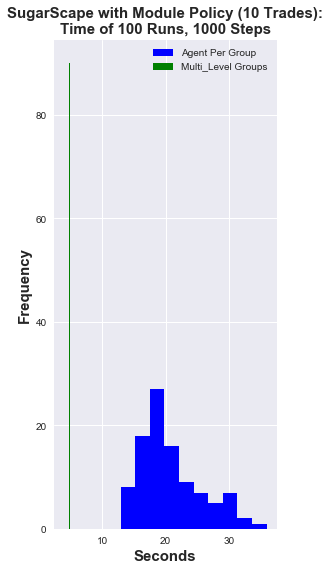

In [61]:
fig6, ax6 = plt.subplots(figsize=(4,9))
plt.hist(num_agents_per_group, label = "Agent Per Group", color = 'blue')
plt.hist(common_groups, label = "Multi_Level Groups", color ='green')
#plt.hist(net_multi_t_g, label = "Common Resource", color = 'red')


#plt.text(78, 25, "Network p-value: "+str(net_t_p) +"\nExplicit p-value: "+str(brute_t_p))
plt.legend()
plt.title("SugarScape with Module Policy (10 Trades):\nTime of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
#plt.text(108, 20, "\nStandard Mean:\n"+str(stan_time) + "\nNetwork Mean:\n"+str(net_time) +"\nExplicit Mean:\n"+str(brute_time))
plt.xlabel("Seconds", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency", fontweight = "bold", fontsize = 15)